In [ ]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [ ]:
%matplotlib inline
import numpy as np 
from matplotlib import pyplot as plt

In [ ]:
from pandas import read_csv
import seaborn as sns

data = read_csv('./result/trial1/result.csv')
sns.relplot(kind='scatter', x=data['layer'], y=data['accuracy'], style=data['circuit_id'],
            style_order={i:f"${i}$" for i in range(1, 4+1)})

In [ ]:
data = read_csv('./result/trial1/data.csv')
data.columns

In [ ]:
from pandas import DataFrame
data = read_csv('./result/trial1/data.csv')
data = data.pivot_table(values=['accuracy', 'num_iter', 'expr', 'entcap', 'last_cost_avg'], index=['circuit_id', 'num_params', 'layer'],
                        aggfunc={'accuracy':['mean', 'median', 'std'],
                                 'num_iter':['mean', 'median', 'std'],
                                 'expr':'mean',
                                 'entcap':'mean',
                                 'last_cost_avg':'mean'})
data1 = np.array(list(data.index))
data2 = data.to_numpy()
if len(data1.shape) == 1:
    data1 = data1.reshape(-1, 1)
data = DataFrame(
    data=np.hstack([data1, data2]),
    columns=list(data.index.names) + list(data.columns)
)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
ax = axes[0]
for cid in range(1, 5):
    _data = data.loc[data['circuit_id'] == cid]
    ax.errorbar(x=_data['num_params'], y=_data[('accuracy', 'mean')], yerr=_data[('accuracy', 'std')],
                linestyle='none', marker='', color=colors[cid], capsize=3, alpha=0.5)
    colorble =ax.scatter(x=_data['num_params'], y=_data[('accuracy', 'median')], c=np.log10(_data[('expr', 'mean')]),
               cmap='plasma', marker=f"${cid}$", s=100)
fig.colorbar(colorble, ax=ax)
ax.set_xlabel('num_params')
ax.set_ylabel('accuracy')
ax.set_title('log10(expr)')
ax = axes[1]
for cid in range(1, 5):
    _data = data.loc[data['circuit_id'] == cid]
    ax.errorbar(x=_data['num_params'], y=_data[('accuracy', 'mean')], yerr=_data[('accuracy', 'std')],
                 linestyle='none', marker='', color=colors[cid], capsize=3, alpha=0.5)
    colorble =ax.scatter(x=_data['num_params'], y=_data[('accuracy', 'median')], c=_data[('entcap', 'mean')],
                cmap='plasma', marker=f"${cid}$", s=100)
fig.colorbar(colorble, ax=ax)
ax.set_xlabel('num_params')
ax.set_ylabel('accuracy')
ax.set_title('ent. cap.')
fig.tight_layout()
fig.savefig('./result')

In [ ]:
data

In [ ]:
from pandas import DataFrame
data = read_csv('./result/trial1/data.csv')
data = data.pivot_table(values=['accuracy', 'num_iter'], index=['circuit_id', 'num_params'])
data1 = np.array(list(data.index))
data2 = data.to_numpy()
if len(data1.shape) == 1:
    data1 = data1.reshape(-1, 1)
data = DataFrame(
    data=np.hstack([data1, data2]),
    columns=list(data.index.names) + list(data.columns)
)
data

In [ ]:
sns.relplot(data=data.loc[(data['circuit_id']==1) | (data['circuit_id']==2)], x='num_params', y='num_iter', style='circuit_id', hue='accuracy')

In [ ]:
from classifiers.quantum.ansatz import Circuit5
qc = Circuit5(5, reps=1)

from qiskit.utils import QuantumInstance
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

quantum_instance = QuantumInstance(AerSimulator(), shots=2**15)
qc.measure_all(inplace=True)
result = quantum_instance.execute(qc.assign_parameters(dict(zip(qc.parameters, np.random.rand(qc.num_parameters)))))
plot_histogram(result.get_counts())

In [ ]:
from classifiers.datasets import IrisDataset
X = np.load('./result/trial1/Dataset #0/Xt.npy')
y = np.load('./result/trial1/Dataset #0/yt.npy')
IrisDataset(true_hot=0).plot([X, y])

In [ ]:
from pandas import DataFrame
data = read_csv('./result/trial1/data.csv')
data = data.loc[(data['circuit_id']==3) & (data['layer']<=4)]
sns.lineplot(data=data, x='num_iter', y='accuracy', hue='layer')

In [ ]:
data = read_csv('./result/trial1/data.csv')

data = read_csv('./result/trial1/data.csv')
data = data.pivot_table(values=['accuracy', 'num_iter'], index=['circuit_id', 'num_params', 'layer'],
                        aggfunc=[np.median, np.mean, np.std])
data1 = np.array(list(data.index))
data2 = data.to_numpy()
if len(data1.shape) == 1:
    data1 = data1.reshape(-1, 1)
data = DataFrame(
    data=np.hstack([data1, data2]),
    columns=list(data.index.names) + list(data.columns)
)
data

In [ ]:
plt.scatter(x=data[('mean', 'num_iter')], y=data[('median', 'accuracy')], marker='.')
plt.errorbar(x=data[('mean', 'num_iter')], y=data[('mean', 'accuracy')], #xerr=data[('std', 'num_iter')],
             yerr=data[('std', 'accuracy')], marker='', linestyle='none')

In [ ]:
plt.errorbar(x=data['circuit_id'], y=data[('mean', 'accuracy')],
             yerr=data[('std', 'num_iter')], marker='.', linestyle='none')

In [ ]:
import numpy as np
import json
from pathlib import Path
with open('./run_experiment_setting.json', 'r') as f:
    _setting = json.load(fp=f)
    path = Path('./result/sampling')
    with open('./sampling_setting.json', 'w') as g:
        _setting['NUM_PQC_SAMPLE'] = 0
        _setting["NUM_ALPHA_SAMPLE"] = 0
        _setting["BINS"] = 75
        _setting["BASE"] = np.e
        json.dump(_setting, g, indent=4)

In [4]:
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

import json
%matplotlib inline

In [34]:
alpha_samples = []
for si in range(2**12):
    with open(f'./result/sampling/Dataset #{si}/result.json', 'r') as f:
        data = json.load(fp=f)
        alpha = np.abs(np.asarray(data['statevector_real'])+1j*np.asarray(data['statevector_imag']))**2
        alpha_samples.append(alpha)

In [35]:
kld = []
for i in range(int(len(alpha_samples)/2)):
    pr1 = alpha_samples[2*i]
    pr2 = alpha_samples[2*i+1]
    kld.append(entropy(pr1, pr2, base=2))

dist, bin_edges = np.histogram(
    kld, bins=75, range=(0, 1), weights=np.ones(len(kld))/len(kld)
)
bin_mids = 1/2*(bin_edges[:-1]+bin_edges[1:])

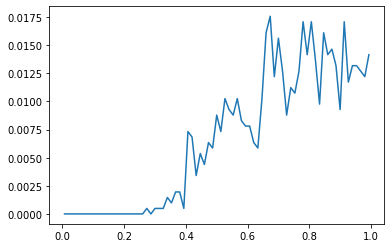

In [36]:
plt.plot(bin_mids, dist)

In [74]:
from qiskit.quantum_info import Statevector, hellinger_fidelity

def kld_cost(params, pqc):
    _qc = pqc.assign_parameters(dict(zip(pqc.parameters, params)))
    _prv = Statevector(_qc).probabilities()
    _alpha_ref = np.random.choice(len(alpha_samples), 1).item()
    return entropy(alpha_samples[_alpha_ref], _prv, base=2)

def hell_fid(params, pqc):
    _qc = pqc.assign_parameters(dict(zip(pqc.parameters, params)))
    _prv = Statevector(_qc).sample_counts(2**15)
    _alpha_ref = np.random.choice(len(alpha_samples), 1).item()
    _alpha = Statevector(np.sqrt(alpha_samples[_alpha_ref])).sample_counts(2**15)
    return hellinger_fidelity(_alpha, _prv)

class Wrapper:
    def __init__(self, pqc):
        self.pqc = pqc

    def __call__(self, params):
        return hell_fid(params, self.pqc)

    @property
    def num_parameters(self):
        return self.pqc.num_parameters

  0%|          | 0/8 [00:00<?, ?it/s]

layer=1:   0%|          | 0/16384 [00:00<?, ?it/s]

layer=2:   0%|          | 0/16384 [00:00<?, ?it/s]

layer=3:   0%|          | 0/16384 [00:00<?, ?it/s]

layer=4:   0%|          | 0/16384 [00:00<?, ?it/s]

layer=5:   0%|          | 0/16384 [00:00<?, ?it/s]

layer=6:   0%|          | 0/16384 [00:00<?, ?it/s]

layer=7:   0%|          | 0/16384 [00:00<?, ?it/s]

layer=8:   0%|          | 0/16384 [00:00<?, ?it/s]

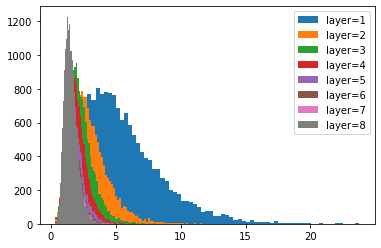

In [48]:
from tqdm.notebook import tqdm
from classifiers.quantum.ansatz import sample_circuit
for l in tqdm(range(1, 1+8)):
    cost_fn = Wrapper(sample_circuit(3)(5, reps=l))
    kld_samples = list(tqdm(map(cost_fn, 2 * np.pi * np.random.rand(2**14, cost_fn.num_parameters)), total=2**14, desc=f"layer={l}"))
    plt.hist(kld_samples, bins=75, label=f'layer={l}')
plt.legend()

In [ ]:
from tqdm.notebook import tqdm
from classifiers.quantum.ansatz import sample_circuit
for l in tqdm(range(1, 1+8)):
    cost_fn = Wrapper(sample_circuit(4)(5, reps=l))
    kld_samples = list(tqdm(map(cost_fn, 2 * np.pi * np.random.rand(2**10, cost_fn.num_parameters)), total=2**10, desc=f"layer={l}"))
    plt.hist(kld_samples, bins=75,weights = np.ones(2**10)/2**10, label=f'layer={l}')
plt.legend()

In [54]:
import dill
import json

with open('./result/trial2(Pseudo)/.setting.json', 'r') as f:
    setting = json.load(fp=f)

data = []
for ci in setting['CIRCUIT_ID']:
    for l in setting['LAYERS']:
        for r in range(setting['REPEATS']):
            try:
                with open(f'./result/trial2(Pseudo)/Dataset #0/Circuit #{ci}/layer={l}/{r}/result.json', 'r') as g:
                    data.append(list(json.load(fp=g).values()))
            except FileNotFoundError as e:
                print(e)

[Errno 2] No such file or directory: './result/trial2(Pseudo)/Dataset #0/Circuit #1/layer=5/3/result.json'


[[0,
  1,
  1,
  10,
  0.34310322243895924,
  1.9597703841513058e-32,
  1024,
  0.10292589200467851,
  0.9375],
 [0,
  1,
  1,
  10,
  0.3472212188903465,
  1.9544439024999343e-32,
  1024,
  0.10311031963367376,
  0.9375],
 [0,
  1,
  1,
  10,
  0.35840921423590966,
  1.909724056133423e-32,
  1024,
  0.10282318379283233,
  0.9375],
 [0,
  1,
  1,
  10,
  0.34849548180903167,
  1.8724921796676458e-32,
  1024,
  0.1049520955945201,
  0.9375],
 [0,
  1,
  2,
  20,
  0.22632910211222754,
  6.282627858550968e-32,
  1024,
  0.10297035577438512,
  0.9375],
 [0,
  1,
  2,
  20,
  0.25598917779415487,
  6.250272162700496e-32,
  1024,
  0.10826286367783355,
  0.9375],
 [0,
  1,
  2,
  20,
  0.2617072464696262,
  6.263966157189133e-32,
  1024,
  0.10290968066131223,
  0.9375],
 [0,
  1,
  2,
  20,
  0.2770580959506763,
  6.250121524418665e-32,
  1024,
  0.10289890345201075,
  0.9375],
 [0,
  1,
  3,
  30,
  0.238635301152705,
  1.1502026777848184e-31,
  1024,
  0.1047717136005873,
  0.9375],
 [0,

In [55]:
with open(f'./result/trial2(Pseudo)/Dataset #0/Circuit #{ci}/layer={l}/{r}/result.json', 'r') as g:
    columns = list(json.load(fp=g).keys())


In [58]:
from pandas import DataFrame, pivot_table

data = DataFrame(data=np.array(data), columns=columns)
data

,dataset,circuit_id,layer,num_params,expr,entcap,num_iter,last_cost_avg,accuracy
0,0.0,1.0,1.0,10.0,0.343103,1.959770e-32,1024.0,0.102926,0.93750
1,0.0,1.0,1.0,10.0,0.347221,1.954444e-32,1024.0,0.103110,0.93750
2,0.0,1.0,1.0,10.0,0.358409,1.909724e-32,1024.0,0.102823,0.93750
3,0.0,1.0,1.0,10.0,0.348495,1.872492e-32,1024.0,0.104952,0.93750
4,0.0,1.0,2.0,20.0,0.226329,6.282628e-32,1024.0,0.102970,0.93750
...,...,...,...,...,...,...,...,...,...
250,0.0,19.0,7.0,105.0,0.013366,8.853953e-01,1024.0,0.073400,0.90625
251,0.0,19.0,8.0,120.0,0.005401,8.915303e-01,1024.0,0.077487,0.87500
252,0.0,19.0,8.0,120.0,0.013121,8.933365e-01,1024.0,0.075309,0.90625
253,0.0,19.0,8.0,120.0,0.006439,8.905956e-01,1024.0,0.075211,0.90625


In [60]:
def pivot_and_draw(data: DataFrame):
    df = data.pivot_table(
        index=columns[:4],
        values=columns[4:],
    )
    data1 = np.array(list(df.index))
    data2 = df.to_numpy()
    if len(data1.shape) == 1:
        data1 = data1.reshape(-1, 1)
    result = DataFrame(
        data=np.hstack([data1, data2]),
        columns=list(df.index.names) + list(df.columns)
    )
    return result

In [61]:
result = pivot_and_draw(data)
result

,dataset,circuit_id,layer,num_params,accuracy,entcap,expr,last_cost_avg,num_iter
0,0.0,1.0,1.0,10.0,0.937500,1.924108e-32,0.349307,0.103453,1024.0
1,0.0,1.0,2.0,20.0,0.937500,6.261747e-32,0.255271,0.104260,1024.0
2,0.0,1.0,3.0,30.0,0.937500,1.135797e-31,0.262207,0.103344,1024.0
3,0.0,1.0,4.0,40.0,0.937500,1.619551e-31,0.265476,0.102962,1024.0
4,0.0,1.0,5.0,50.0,0.937500,2.142484e-31,0.255153,0.102920,1024.0
...,...,...,...,...,...,...,...,...,...
59,0.0,19.0,4.0,60.0,0.898438,7.993107e-01,0.010775,0.079508,1024.0
60,0.0,19.0,5.0,75.0,0.906250,8.392706e-01,0.007555,0.076744,1024.0
61,0.0,19.0,6.0,90.0,0.906250,8.675672e-01,0.011032,0.075492,1024.0
62,0.0,19.0,7.0,105.0,0.898438,8.829988e-01,0.009124,0.075569,1024.0


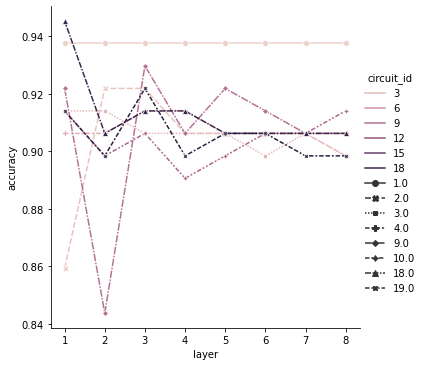

In [73]:
import seaborn as sns

sns.relplot(data=result, x='layer', y='accuracy', style='circuit_id', kind='line', markers=True, hue='circuit_id')

In [92]:
with open('./result/trial5/Dataset #0/Circuit #3/layer=2/0/nqsvm', 'rb') as f:
    nqsvm = dill.load(f)
nqsvm

Normalized QSVM(28 number of params)

In [93]:
import time
start = time.time()
nqsvm.cost_fn(nqsvm.parameters)
print(time.time()-start)

7.548978567123413


In [94]:
for _ in range(3):
    nqsvm.second_order_circuit.remove_final_measurements()

In [105]:
start = time.time()
params = np.concatenate((nqsvm.parameters, nqsvm.parameters))
sv = Statevector(nqsvm.second_order_circuit.assign_parameters(dict(zip(nqsvm.second_order_circuit.parameters, params))))
sv.probabilities_dict([0, int(nqsvm.second_order_circuit.num_qubits-1)/2, nqsvm.second_order_circuit.num_qubits-1])
print(time.time()-start)

140.50275182724


In [109]:
from qiskit.quantum_info import Pauli

start = time.time()
params = np.concatenate((nqsvm.parameters, nqsvm.parameters))
sv = Statevector(nqsvm.second_order_circuit.assign_parameters(dict(zip(nqsvm.second_order_circuit.parameters, params))))
sv.expectation_value(Pauli('ZZZ'), [0, int(nqsvm.second_order_circuit.num_qubits-1)/2, nqsvm.second_order_circuit.num_qubits-1])
print(time.time()-start)


TypeError: ufunc 'left_shift' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [110]:
print(time.time()-start)


157.85826349258423


In [119]:
Xt = np.load('./result/trial1/Dataset #0/Xt.npy')
yt = np.load('./result/trial1/Dataset #0/yt.npy')
with open('./result/trial1/Dataset #0/Circuit #4/layer=8/6/storage', 'rb') as f:
    storage = dill.load(f)

In [142]:
storage.data[storage.data.columns[2:-3]].iloc[0].to_numpy()

array([ 1.88430479, -4.01740082, -2.67040502, -1.48263922,  3.9823833 ,
       -2.5924553 , -0.60848038,  0.31031754,  0.35897235,  2.28843566,
        4.0710959 ,  0.53153512,  1.60944211, -3.50617925, -2.9794198 ,
       -0.47758112,  1.69892574, -2.5130378 , -3.59321027,  1.93918996,
       -1.64980701,  4.00528335, -3.53818348, -0.25549806, -3.82720677,
       -3.86065381,  1.78387656,  0.37053737, -1.21981436,  1.5519229 ,
        3.64972377,  0.62941307, -1.2862672 , -1.01933918, -2.24357106,
       -0.38318215,  1.9072594 ,  3.37244087, -1.66783361, -0.52017879,
        0.30629218, -1.687096  , -0.61895378,  1.35356206,  0.55916621,
        2.19080066,  1.42242083, -1.00868563,  2.20595747, -1.48286564,
       -0.40922457,  2.55054998, -1.33725705,  1.99038997,  1.312554  ,
        1.98367895, -1.7682233 ,  4.07449528,  3.71433504, -1.49483711,
       -1.61307986,  2.43421278,  4.05004743, -1.41352359,  2.42692361,
       -4.01391247,  2.03092334, -3.30548287, -0.99138818, -2.29

In [139]:
len(storage.data.iloc[0].to_list()[2:-3])

112